In [27]:
heart = pd.read_csv('heart.csv', sep=',')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


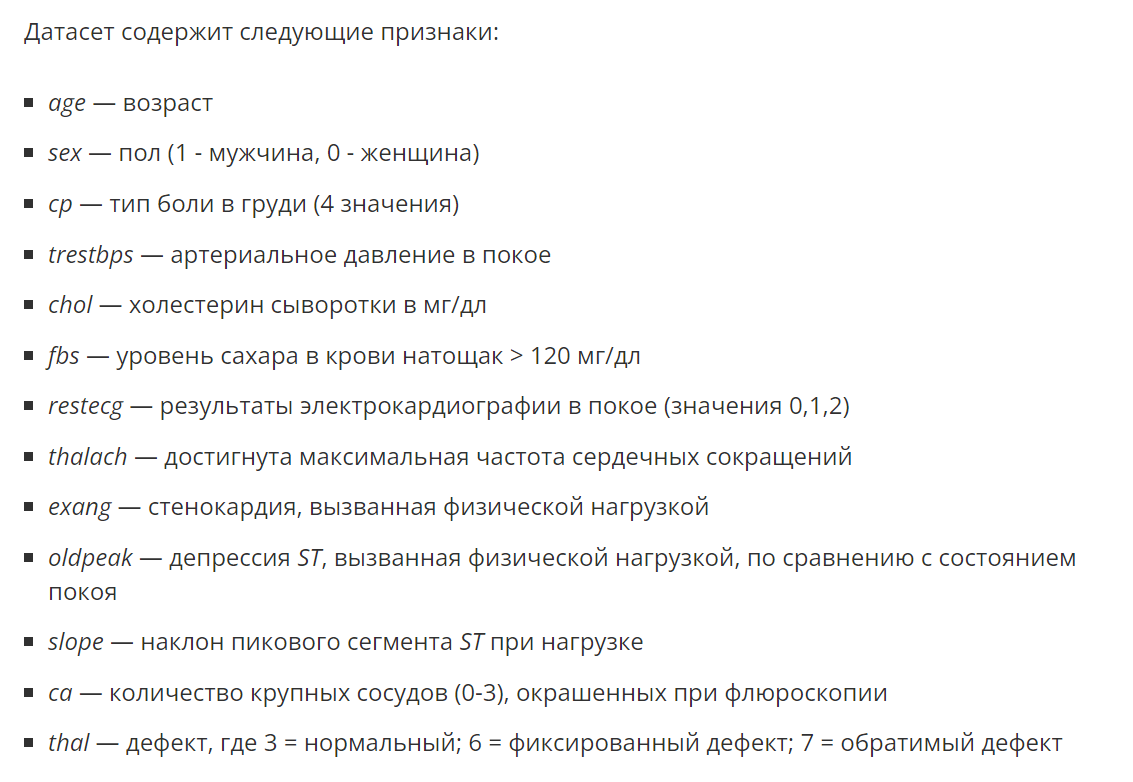

Создадим новый признак old, где 1 — при возрасте пациента более 60 лет.

In [28]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

Создадим новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмём из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.


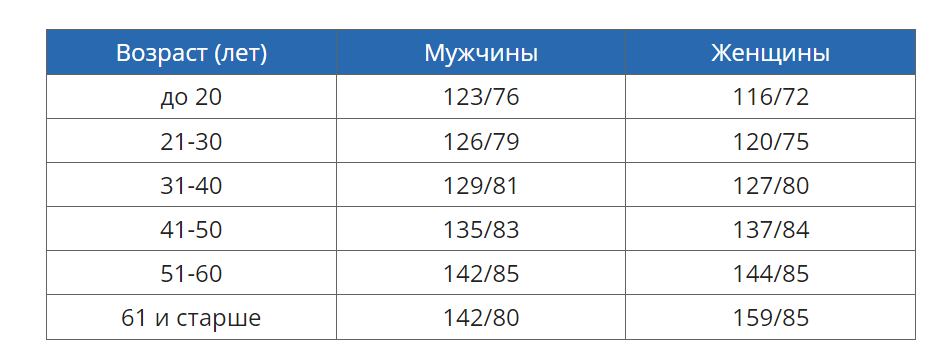

In [29]:
# создадим функцию которая будет возвращать среднее значение давления согласно таблицы
def trestb_ps (age, sex):
    if sex == 1:
        if age<=20:
            trestb = 123
        elif 21<=age<=31:
            trestb = 126
        elif 31<=age<=40:
            trestb = 129
        elif 41<=age<=50:
            trestb = 135
        elif 51<=age<=60:
            trestb = 142
        elif age>=61:
            trestb = 142
        return trestb

    elif sex == 0:
        if age<=20:
            trestb = 116
        elif 21<=age<=31:
            trestb = 120
        elif 31<=age<=40:
            trestb = 127
        elif 41<=age<=50:
            trestb = 137
        elif 51<=age<=60:
            trestb = 144
        elif age>=61:
            trestb = 159

        return trestb 

Пример кода apply функции def по условию двух столбцов pandas dataframe

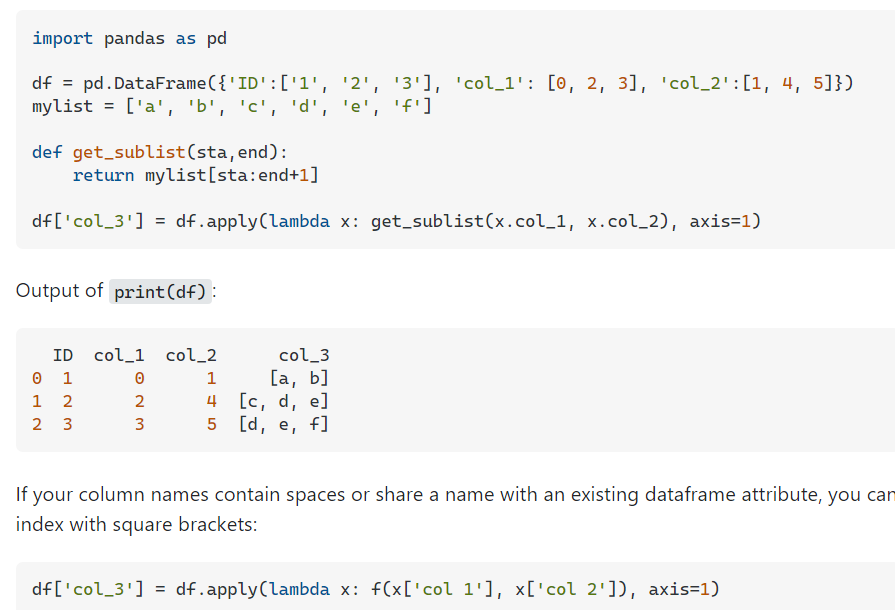

In [30]:
heart['trestbps_mean'] =  heart [['age', 'sex']].apply(lambda x: trestb_ps(x.age, x.sex), axis=1)
heart.loc[300]

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

In [31]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


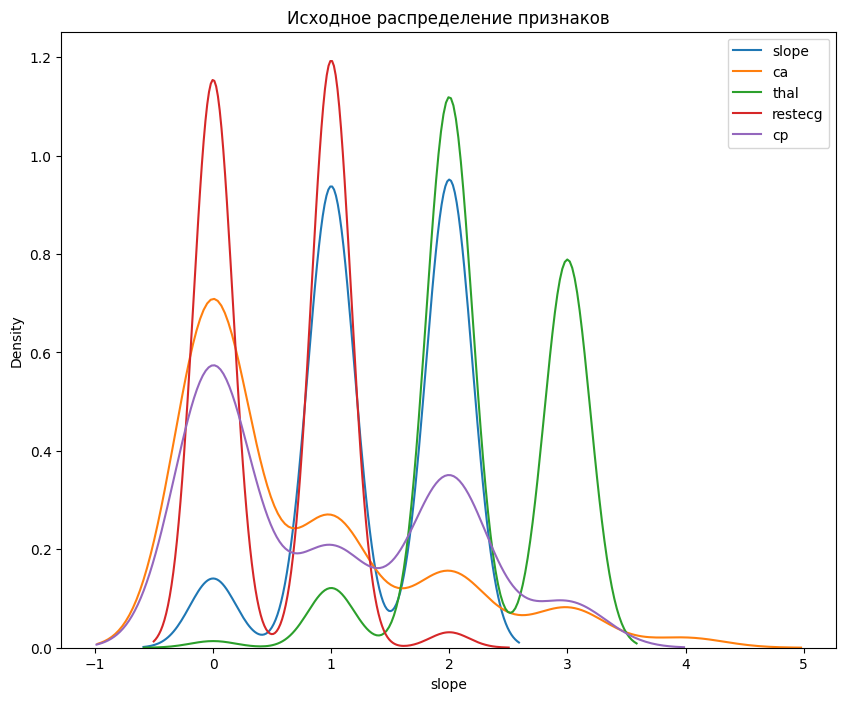

In [32]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (axis) = plt.subplots(ncols = 1, figsize = (10,8))
axis.set_title('Исходное распределение признаков')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart['slope'], ax = axis, label = 'slope')
sns.kdeplot(heart['ca'], ax = axis, label = 'ca')
sns.kdeplot(heart['thal'], ax = axis, label = 'thal')

sns.kdeplot(heart['restecg'], ax = axis, label = 'restecg')
sns.kdeplot(heart['cp'], ax = axis, label = 'cp')
plt.legend()

Закодируем вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.

In [33]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками


In [34]:
encoder = ce.OneHotEncoder(cols = ['slope','ca', 'thal', 'restecg', 'cp'], use_cat_names=True)
cols= encoder.fit_transform(heart[['slope','ca', 'thal', 'restecg', 'cp']])
heart = pd.concat([heart, cols], axis = 1 )



In [35]:
#удалим исходные признаки.
heart = heart.drop(['slope','ca', 'thal', 'restecg', 'cp'], axis=1)

In [36]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  slope_0.0      303 non-null    int64  
 12  slope_2.0      303 non-null    int64  
 13  slope_1.0      303 non-null    int64  
 14  ca_0.0         303 non-null    int64  
 15  ca_2.0         303 non-null    int64  
 16  ca_1.0         303 non-null    int64  
 17  ca_3.0         303 non-null    int64  
 18  ca_4.0    

['slope','ca', 'thal', 'restecg', 'cp']

In [37]:
# создадим список колонок
col_list = list(heart.columns)

In [38]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [42]:
# Используем норамализацию Robustscaler

r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart)
heart_r = pd.DataFrame(heart_r, columns=col_list)
heart_r['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<AxesSubplot: >

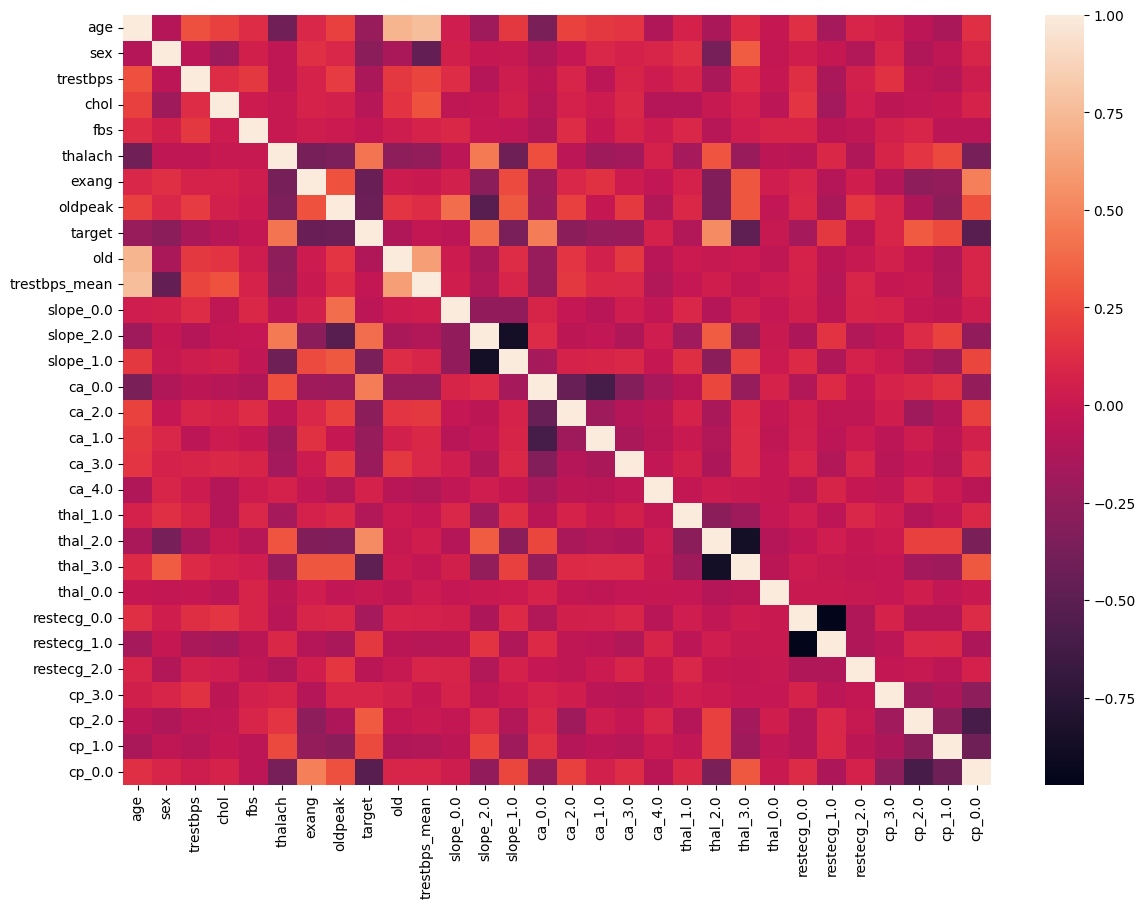

In [43]:
axis_2= plt.subplots(ncols=1, figsize=(14, 10))

sns.heatmap(heart_r.corr())
